In [40]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, make_scorer, root_mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
import joblib
from sklearn.linear_model import ElasticNet,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import copy
from sklearn.svm import SVR
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
from sklearn.ensemble import IsolationForest
from scipy.stats import skew

In [4]:
#Función para plotear variables numericas de un dataframe 
def box_numeric(x: list, df: pd.DataFrame):
    n_columns = 4  # Número de columnas por fila
    total = len(x)  # Número total de columnas en el DataFrame
    # Calcular el número de filas necesario
    n_rows = (total + n_columns - 1) // n_columns
    # Aumentar el tamaño de la figura para que los gráficos no estén tan apretados
    fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 10))
    
    # Asegurarnos de aplanar la cuadrícula para iterar fácilmente sobre ella
    axes = axes.flatten()
    
    # Graficar cada variable numérica
    for i, col in enumerate(x):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'Displot of {col}')

    # Eliminar los subplots vacíos si hay menos gráficos que espacios en la cuadrícula
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Ajustar el espacio entre los subplots
    plt.tight_layout()
    plt.show()
    
#Función para plotear variables numericas de un dataframe 
def displot_numeric(x: list, df: pd.DataFrame):
    n_columns = 4  # Número de columnas por fila
    total = len(x)  # Número total de columnas en el DataFrame
    # Calcular el número de filas necesario
    n_rows = (total + n_columns - 1) // n_columns
    # Aumentar el tamaño de la figura para que los gráficos no estén tan apretados
    fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 10))
    
    # Asegurarnos de aplanar la cuadrícula para iterar fácilmente sobre ella
    axes = axes.flatten()
    
    # Graficar cada variable numérica
    for i, col in enumerate(x):
        sns.histplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Displot of {col}')

    # Eliminar los subplots vacíos si hay menos gráficos que espacios en la cuadrícula
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Ajustar el espacio entre los subplots
    plt.tight_layout()
    plt.show()

In [ ]:
#Importat el dataset
df = pd.read_csv('Online Retail.csv')

In [6]:
print('Cantidad de datos en el DataFrame:', df.shape[0])

Cantidad de datos en el DataFrame: 541909


In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
#La variable 'CustomerID' hace referencia a un identificador unico, el cual es de tipo string no float            
df['CustomerID'] = df['CustomerID'].astype('string')

In [10]:
#Porcentaje de datos faltantes
round(100*(df.isna().sum()/len(df)),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

Tenemos casi un 25% de datos faltantes para el ID de los clientes, o cual representa 1/4 de los valores totales

In [11]:
#Al ser 'CustomerID' un identificador importante para segmentar a los clientes, no podemos realizar alguna imputación para estos valores
#Por lo que debemos eliminar los valores faltantes para la variable 'CustomerID'"Online Retail.csv"
df_copy = copy.deepcopy(df)
df_copy = df_copy.dropna()

In [12]:
#Porcentaje de datos faltantes
round(100*(df_copy.isna().sum()/len(df_copy)),2)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [13]:
#Eliminamos las cantidades negativas
registros_actuales = df_copy.shape[0]
df_copy = df_copy[df_copy['Quantity'] > 0]
registros_modificados = df_copy.shape[0]
print(f'Registros eliminados: {registros_actuales-registros_modificados}')

Registros eliminados: 8905


In [14]:
#Eliminamos los precios negativos
registros_actuales = df_copy.shape[0]
df_copy = df_copy[df_copy['UnitPrice'] > 0]
registros_modificados = df_copy.shape[0]
print(f'Registros eliminados: {registros_actuales-registros_modificados}')

Registros eliminados: 40


In [15]:
df_copy.describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [16]:
min_price = df_copy['UnitPrice'].min()
min_price_rows = df_copy[df_copy['UnitPrice'] == min_price]
display(min_price_rows)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,15/04/2011 09:27,0.001,13952.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,26/07/2011 10:13,0.001,15618.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,25/09/2011 14:58,0.001,16198.0,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,26/09/2011 17:01,0.001,13405.0,United Kingdom


In [17]:
bank_charges = 'Bank Charges'
bank_charges_rows = df_copy[df_copy['Description'] == bank_charges]
display(bank_charges_rows)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4406,536779,BANK CHARGES,Bank Charges,1,02/12/2010 15:08,15.000,15823.0,United Kingdom
62508,541505,BANK CHARGES,Bank Charges,1,18/01/2011 15:58,15.000,15939.0,United Kingdom
152966,549717,BANK CHARGES,Bank Charges,1,11/04/2011 14:56,15.000,14606.0,United Kingdom
175275,551945,BANK CHARGES,Bank Charges,1,05/05/2011 11:09,15.000,16714.0,United Kingdom
327921,565735,BANK CHARGES,Bank Charges,1,06/09/2011 12:25,15.000,16904.0,United Kingdom
361740,568375,BANK CHARGES,Bank Charges,1,26/09/2011 17:01,15.000,13405.0,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,26/09/2011 17:01,0.001,13405.0,United Kingdom
407618,571900,BANK CHARGES,Bank Charges,1,19/10/2011 14:26,15.000,13263.0,United Kingdom
431351,573586,BANK CHARGES,Bank Charges,1,31/10/2011 14:48,15.000,14704.0,United Kingdom
440745,574546,BANK CHARGES,Bank Charges,1,04/11/2011 14:59,15.000,13651.0,United Kingdom


In [18]:
#Los cargos bancarios no representan realmente una compra realizada por los clientes, eliminamos dichos registros
before_drop = df_copy.shape[0]
df_copy = df_copy[df_copy['Description'] != bank_charges]
after_drop = df_copy.shape[0]
print(f'Registros eliminados: {before_drop-after_drop}')

Registros eliminados: 12


**Parece que el set de datos no necesaita más preprocesamiento**

In [19]:
print(f'Datos totales en el DataFrame despues del preprocesamiento: {df_copy.shape[0]}')

Datos totales en el DataFrame despues del preprocesamiento: 397872


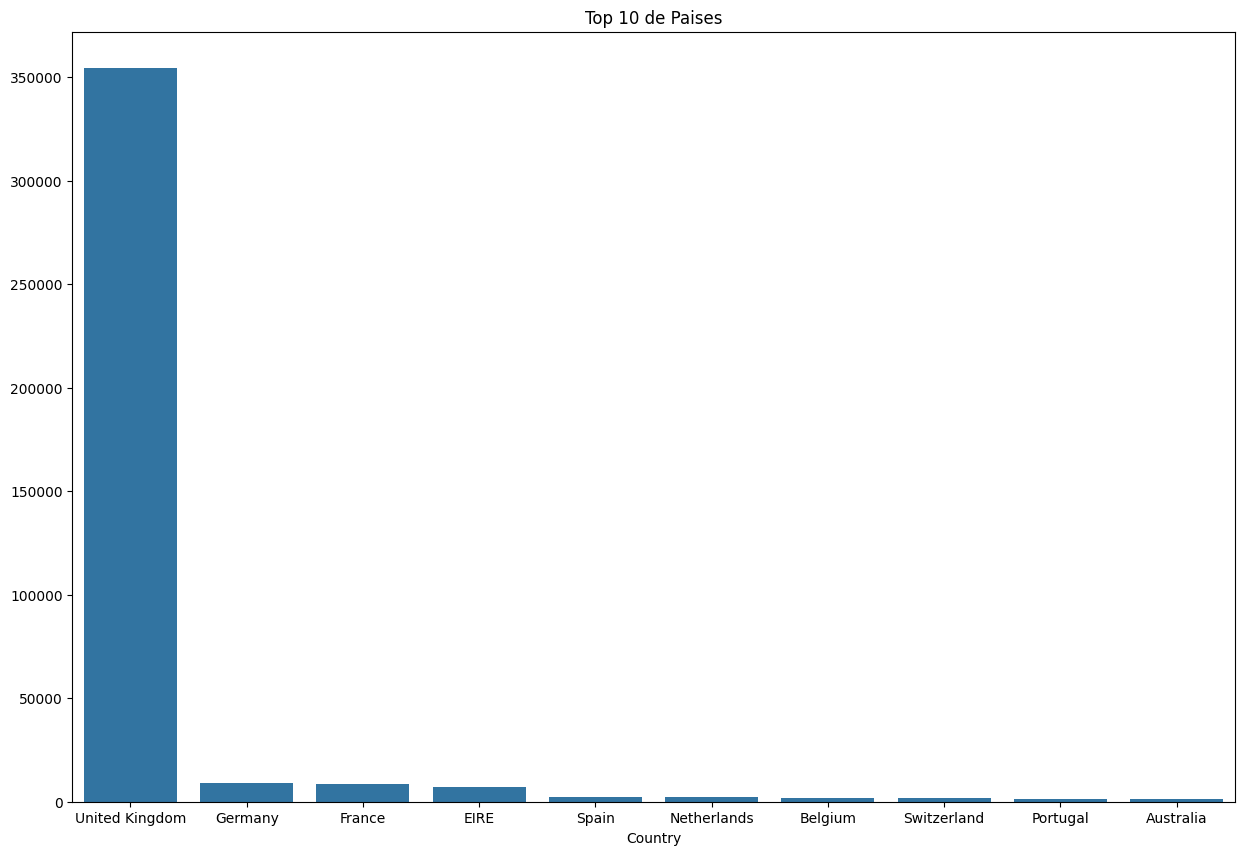

In [20]:
plt.figure(figsize=(15,10))
top_10_countries = df_copy['Country'].value_counts()[:10]
sns.barplot(x = top_10_countries.index, y = top_10_countries.values)
plt.title('Top 10 de Paises')
plt.show()

**Casi el total de compradores son de UK**

## Aplicando la metodología RFM

1. R = Recurency 
2. F = Frecuency 
3. M = Monetary

In [21]:
#Calculo de M (Monetary)
df_copy['Amount'] = df_copy['Quantity']*df_copy['UnitPrice']
df_copy_m = df_copy.groupby('CustomerID')['Amount'].sum() #Agrupamos por CustomerID y seleccionamos Amount para hacer la operacion
df_copy_m = df_copy_m.reset_index() #para poder usar merge 
df_copy_m.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [22]:
#Calculo de F (Frecuency)
df_copy_f = df_copy.groupby('CustomerID')['InvoiceNo'].count()
df_copy_f = df_copy_f.reset_index()
df_copy_f.columns = ['CustomerID', 'Frecuency']
df_copy_f.head()

,CustomerID,Frecuency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [24]:
#Calculo de R (Recency )
df_copy['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')

In [25]:
#Obtener la fecha maxima
max_date = df_copy['InvoiceDate'].max()
print(max_date)
#Calcular la cantidad de días que han pasado 
df_copy['Diff Date'] = max_date - df_copy['InvoiceDate']
df_copy.head()

2011-12-09 12:50:00


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [26]:
#Obtener el Df de Recency 
df_copy_r = df_copy.groupby('CustomerID')['Diff Date'].min()
df_copy_r = df_copy_r.reset_index()
df_copy_r['Diff Date'] = df_copy_r['Diff Date'].dt.days
df_copy_r.head()

,CustomerID,Diff Date
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [27]:
df_copy_rfm = pd.merge(df_copy_r, df_copy_f, on='CustomerID', how='inner')
df_copy_rfm = pd.merge(df_copy_rfm, df_copy_m, on='CustomerID', how='inner')
df_copy_rfm.columns = ['CustomerID', 'Recency(days)', 'Frecuency', 'Monetary']
df_copy_rfm.head()

,CustomerID,Recency(days),Frecuency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


## **TOP 10 clients filtered by 'Monetary'**

In [31]:
top_customers = df_copy_rfm.sort_values(by='Monetary', ascending=False).head(10)
top_customers

,CustomerID,Recency(days),Frecuency,Monetary
1689,14646.0,1,2076,280206.02
4200,18102.0,0,431,259657.30
3727,17450.0,7,337,194550.79
3007,16446.0,0,3,168472.50
1879,14911.0,0,5675,143825.06
55,12415.0,23,714,124914.53
1333,14156.0,9,1400,117379.63
3770,17511.0,2,963,91062.38
2701,16029.0,38,242,81024.84
0,12346.0,325,1,77183.60


## **BOXPLOT DE LAS VARIABLES**

In [30]:
num_type = ['Recency(days)', 'Frecuency', 'Monetary']

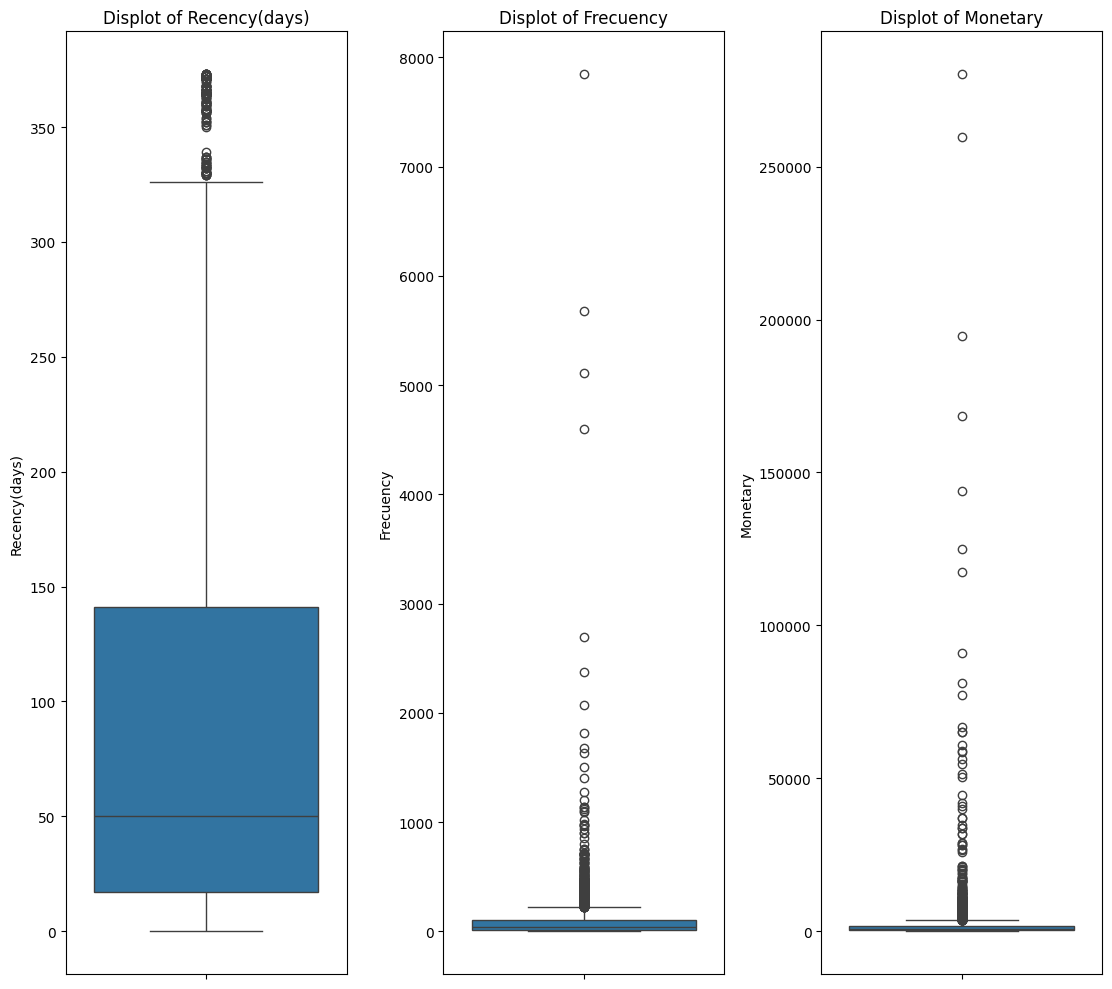

In [31]:
box_numeric(x=num_type, df=df_copy_rfm)

## **Distribución de las variables**

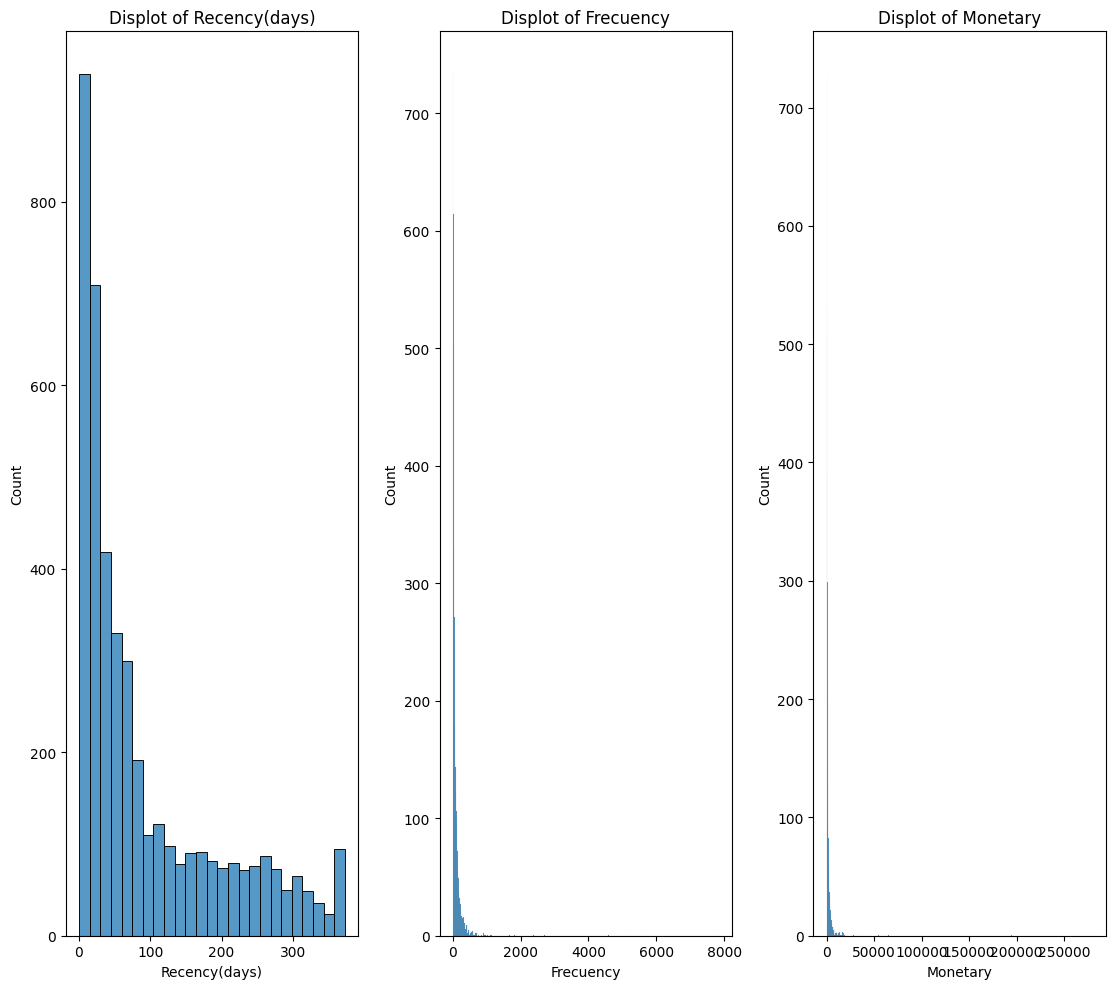

In [32]:
displot_numeric(x=num_type, df= df_copy_rfm)

In [48]:
print("Skewness:")
print(f"Skewness de Recency(days): {df_copy_rfm['Recency(days)'].skew()}")
print(f"Skewness de Frequency: {df_copy_rfm['Frecuency'].skew()}")
print(f"Skewness de Monetary: {df_copy_rfm['Monetary'].skew()}")

Skewness:
Skewness de Recency(days): 1.2451501690277424
Skewness de Frequency: 18.10552358758692
Skewness de Monetary: 19.32296396520588


**Las distribuciones parecen tener un sesogo hacia la izquierda, lo cual puede ser contraproducentes para el modelo y apredner dichos patrones, intentar asemejar una distribución Gaussiana puede ayudar a reducir el sesgo en los datos**

In [37]:
#No queremos tranformar CustomerID
features_to_tranform = df_copy_rfm.drop(columns=['CustomerID'])
# Inicializar el PowerTransformer con el método 'yeo-johnson'
pt = PowerTransformer(method='yeo-johnson', standardize=False)
# Ajustar y transformar todas las columnas
transformed = pt.fit_transform(features_to_tranform)
# Crear nuevo DataFrame con columnas transformadas
df_transformed = pd.DataFrame(transformed, columns=features_to_tranform.columns)
# Volver a agregar la columna 'CustomerID'
df_transformed['CustomerID'] = df_copy_rfm['CustomerID']
df_transformed.head()

,Recency(days),Frecuency,Monetary,CustomerID
0,10.039058,0.693969,7.081454,12346.0
1,0.737106,5.256123,5.883063,12347.0
2,6.460347,3.486336,5.454152,12348.0
3,3.855955,4.335867,5.442757,12349.0
4,9.900609,2.904690,4.529667,12350.0


In [38]:
# Guardar el modelo para producción
joblib.dump(pt, 'yeo_johnson_transformer.pkl')

['yeo_johnson_transformer.pkl']

In [41]:
print("Lambdas usados:")
print(pt.lambdas_)

Lambdas usados:
[ 0.17564024  0.00341659 -0.08982908]


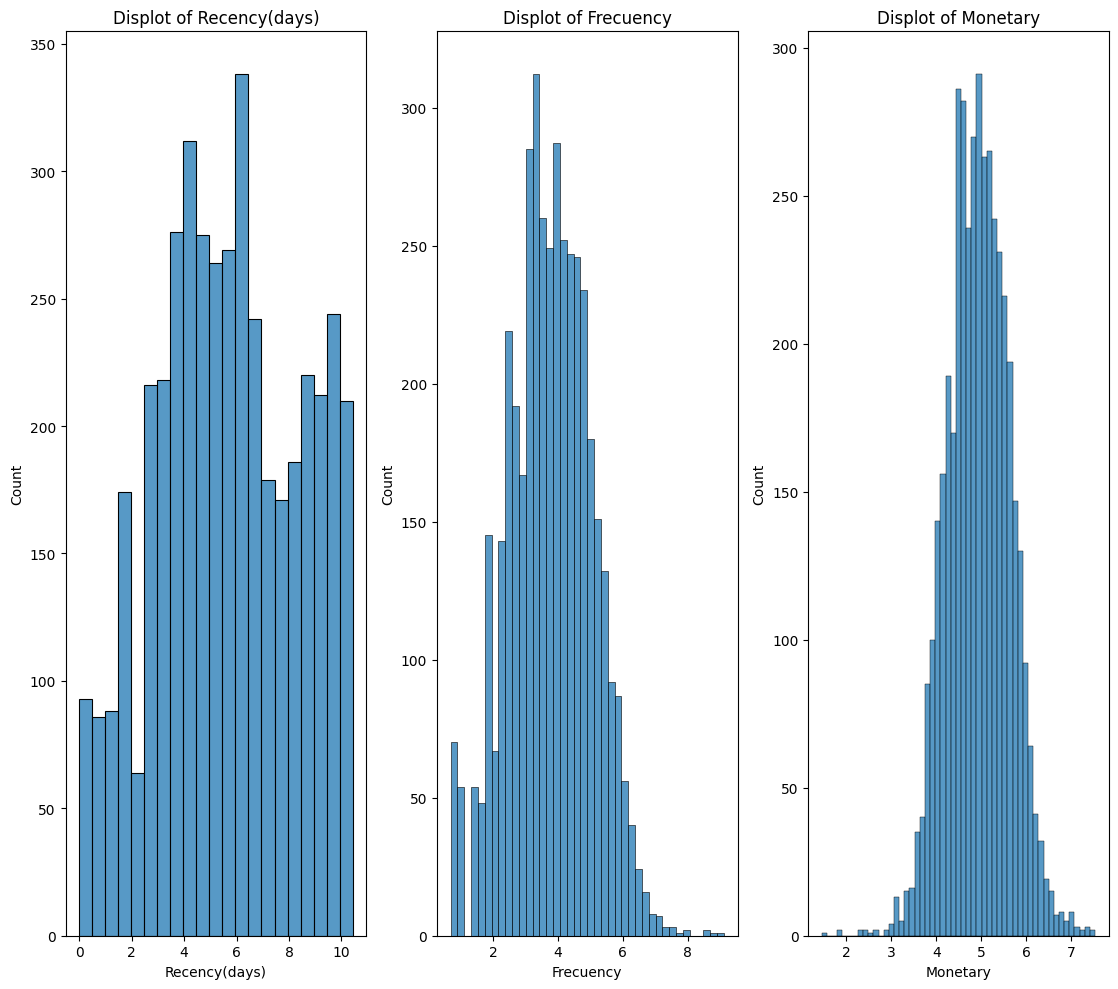

In [42]:
displot_numeric(x = num_type, df= df_transformed)

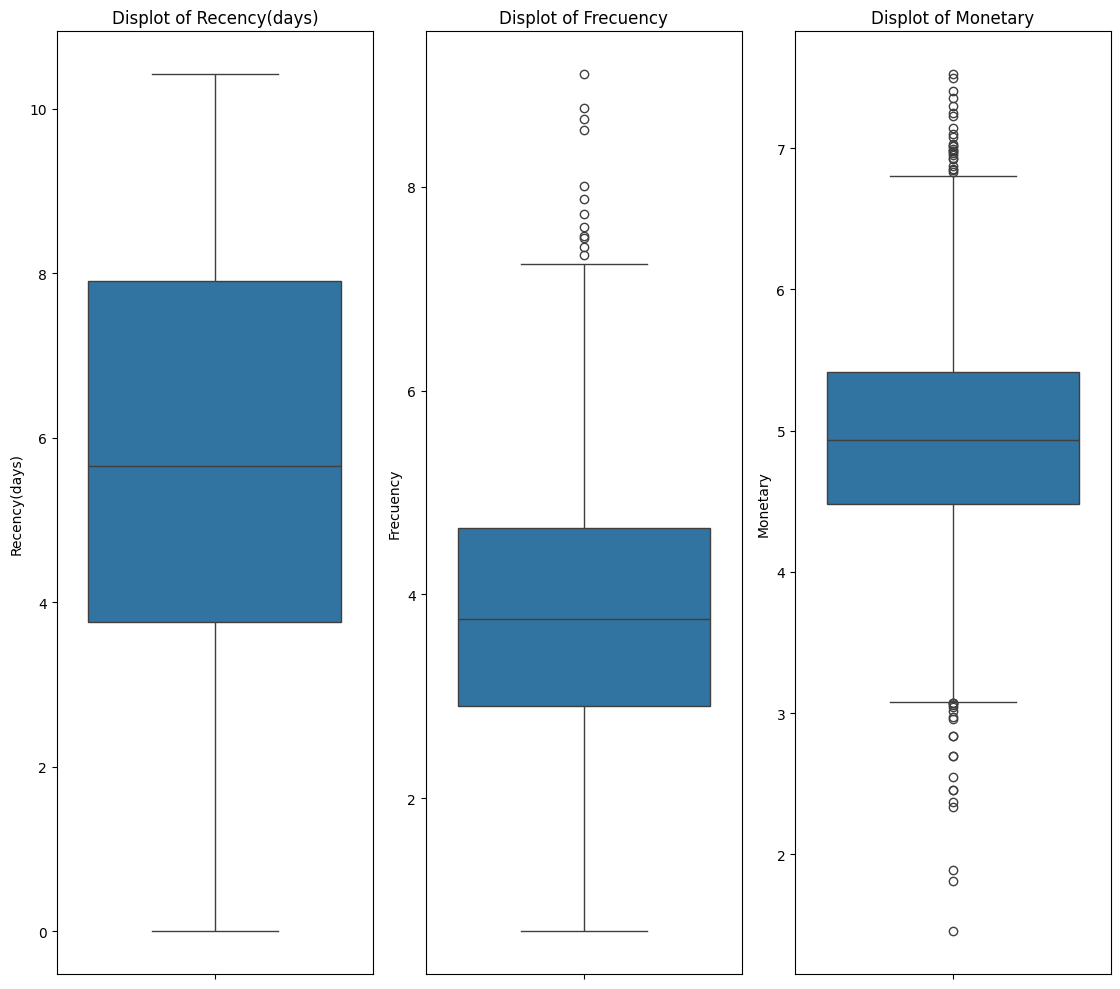

In [43]:
box_numeric(x=num_type, df=df_transformed)

**Los valores atipicos disminuyeron de forma considerable al utlizar yeo-johnson para asemejar más la distribución Gaussiana**

In [44]:
def estimate_contamination_iqr(df, factor=1.5):
    # Estimar porcentaje de outliers en cada columna
    outlier_count = 0
    total_count = len(df)

    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Contar outliers
        outlier_count += ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    # Porcentaje estimado de outliers
    return outlier_count / (total_count * len(df.columns))

In [45]:
df_transformed_contamintaion = df_transformed.drop(columns=['CustomerID'])

In [46]:
contamination_estimate = estimate_contamination_iqr(df_transformed_contamintaion, factor=1)
print(f"Contaminación estimada (IQR): {contamination_estimate}")

Contaminación estimada (IQR): 0.025824302513258013


## **Eliminar los outlayers**

In [47]:
iso_forest = IsolationForest(contamination=contamination_estimate, random_state=42)
outliers = iso_forest.fit_predict(df_transformed_contamintaion)
# Filtrar puntos normales (1) y eliminar outliers (-1)
# Crear copia explícita antes de filtrar
df_filtered = df_transformed[outliers == 1].copy()

# Agregar 'CustomerID'
df_filtered['CustomerID'] = df_transformed['CustomerID']


In [48]:
#Quitar los outlayers del set original 
df_filtered_original  = df_copy_rfm.loc[outliers == 1].copy()
print(f"Tamaño original: {df_copy_rfm.shape}")
print(f"Tamaño después de filtrar outliers: {df_filtered_original.shape}")

Tamaño original: (4337, 4)
Tamaño después de filtrar outliers: (4225, 4)


In [49]:
df_filtered.head()

,Recency(days),Frecuency,Monetary,CustomerID
1,0.737106,5.256123,5.883063,12347.0
2,6.460347,3.486336,5.454152,12348.0
3,3.855955,4.335867,5.442757,12349.0
4,9.900609,2.904690,4.529667,12350.0
5,4.990333,4.488415,5.621137,12352.0


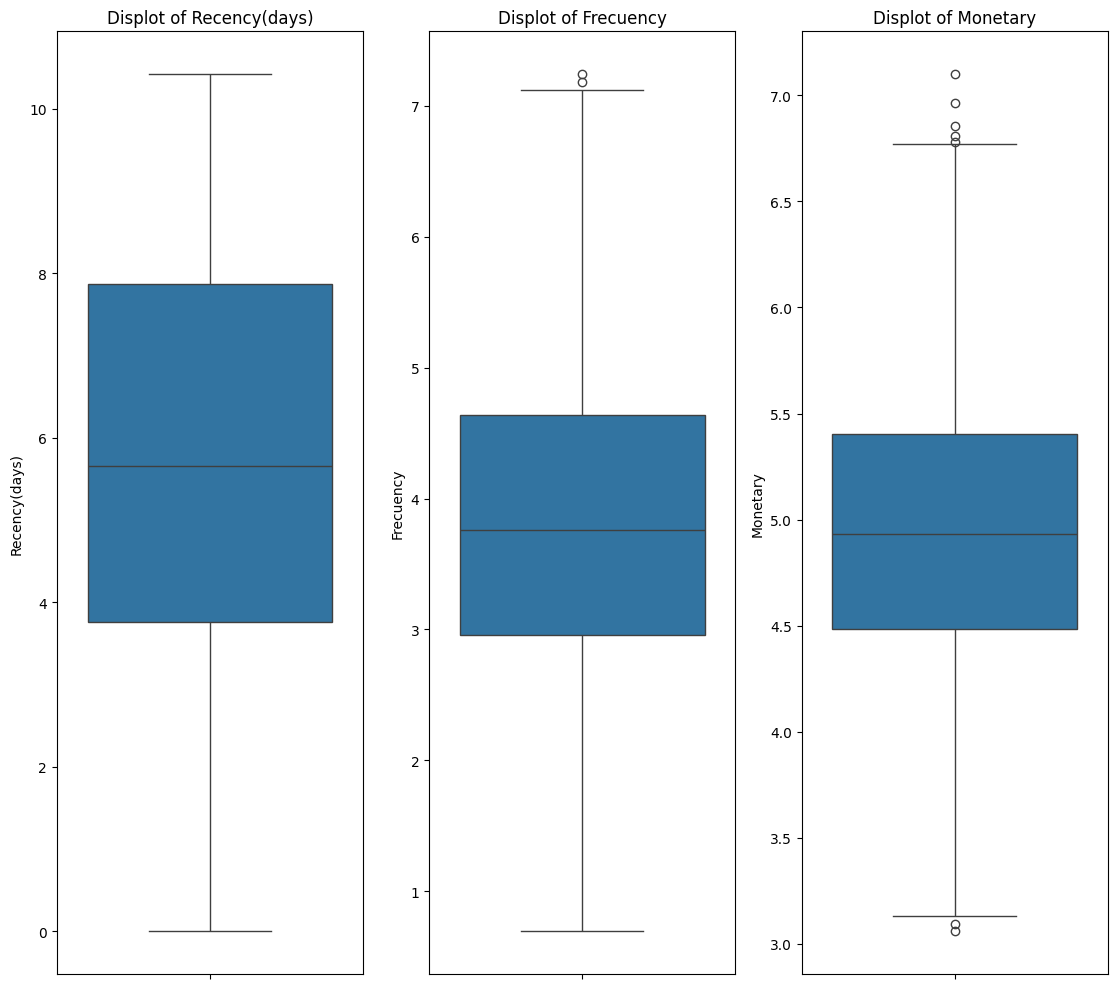

In [50]:
box_numeric(x=num_type, df=df_filtered)

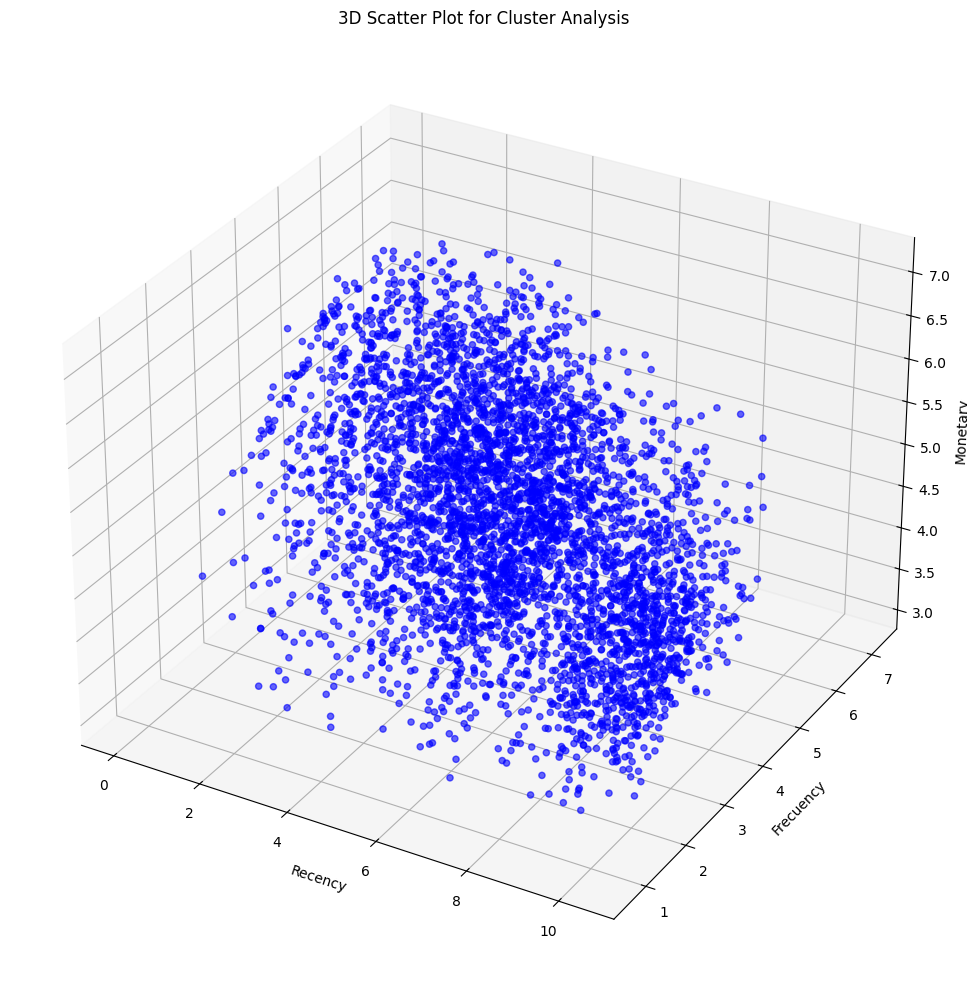

In [51]:
# Crear figura 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Variables numéricas
x = df_filtered['Recency(days)']  # Eje X
y = df_filtered['Frecuency']  # Eje Y
z = df_filtered['Monetary']  # Eje Z

# Gráfico de dispersión 3D
sc = ax.scatter(x, y, z, c='blue', marker='o', alpha=0.6)

# Etiquetas
ax.set_xlabel('Recency')
ax.set_ylabel('Frecuency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot for Cluster Analysis')

plt.tight_layout()
plt.show()

## **Se redujo la cantidad de valores atipicos**

### **Entrenamiento del algoritmo**

In [52]:
#KNN trabaja mejor con datos escalados 
df_scaled = df_filtered[num_type]

#Crear la instancia del escalador 
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_scaled)

In [53]:
# Guardar el modelo de escalamiento para producción
joblib.dump(scaler, 'Scaler_transformer.pkl')

['Scaler_transformer.pkl']

In [54]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Recency(days)', 'Frecuency', 'Monetary']
df_scaled.head()

,Recency(days),Frecuency,Monetary
0,-1.892067,1.242699,1.491422
1,0.286616,-0.242581,0.815164
2,-0.704806,0.470381,0.797197
3,1.596231,-0.730723,-0.642457
4,-0.272978,0.598405,1.078447


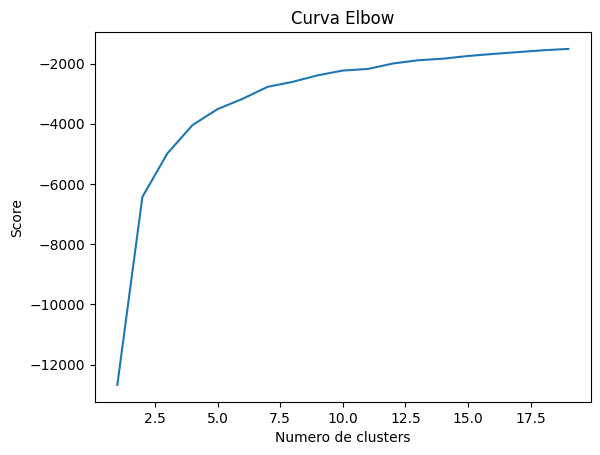

In [55]:
clusters = range(1,20)
Kmeans = [KMeans(n_clusters=n) for n in clusters]

score = [Kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(Kmeans))]
plt.plot(clusters, score)
plt.xlabel('Numero de clusters')
plt.ylabel('Score')
plt.title('Curva Elbow')
plt.show()

In [56]:
#Análisis de silueta
n_clusters = [i for i in range(2,10)]

best_data = ()
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, max_iter=150, random_state=42)
    kmeans.fit(df_scaled)
    clusters_labels = kmeans.labels_
    
    #Silueta score
    silueta_avg = silhouette_score(df_scaled, clusters_labels)
    print(f'Para n_clusters {n} el score de silueta es: {silueta_avg}')

Para n_clusters 2 el score de silueta es: 0.4009840984438117
Para n_clusters 3 el score de silueta es: 0.30069864174513333
Para n_clusters 4 el score de silueta es: 0.30823048972973865
Para n_clusters 5 el score de silueta es: 0.28807925360578523
Para n_clusters 6 el score de silueta es: 0.2753942256769896
Para n_clusters 7 el score de silueta es: 0.26613539697439165
Para n_clusters 8 el score de silueta es: 0.2718208948044313
Para n_clusters 9 el score de silueta es: 0.2637333457489121


In [98]:
#Modelo final 
n_clusters = 2 
model = KMeans(n_clusters=n_clusters, max_iter=150, random_state=42)
model.fit(df_scaled)

#Añadir los resultados al dataset original 
df_filtered['Cluster_id'] = model.labels_

In [106]:
#Guardar el modelo 
joblib.dump(model, 'Modelo_KMeans.pkl')

['Modelo_KMeans.pkl']

In [99]:
df_filtered_original['Cluster_id'] =model.labels_

In [100]:
df_filtered_original

,CustomerID,Recency(days),Frecuency,Monetary,Cluster_id
1,12347.0,1,182,4310.00,1
2,12348.0,74,31,1797.24,1
3,12349.0,18,73,1757.55,1
4,12350.0,309,17,334.40,0
5,12352.0,35,85,2506.04,1
...,...,...,...,...,...
4332,18280.0,277,10,180.60,0
4333,18281.0,180,7,80.82,0
4334,18282.0,7,12,178.05,0
4335,18283.0,3,756,2094.88,1


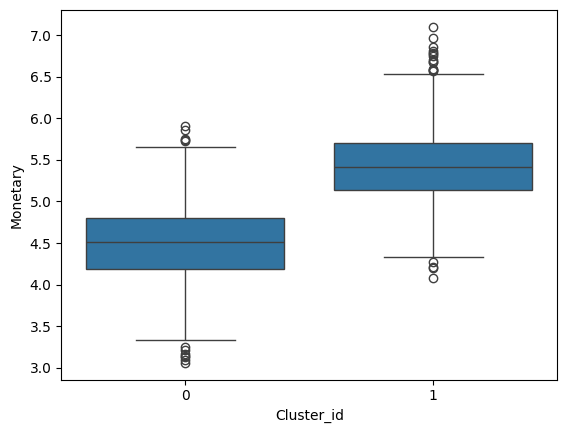

In [101]:
sns.boxplot(x='Cluster_id', y= 'Monetary', data=df_filtered)
plt.show()

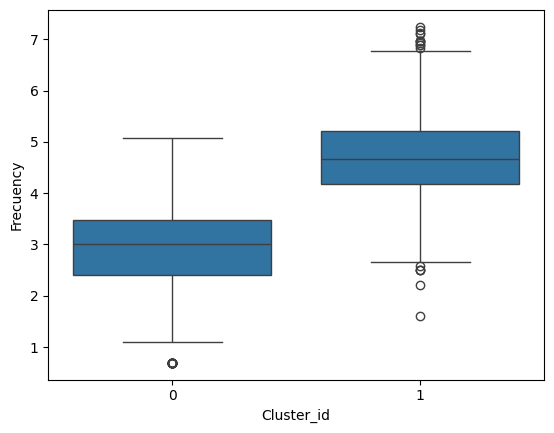

In [102]:
sns.boxplot(x='Cluster_id', y= 'Frecuency', data=df_filtered)
plt.show()

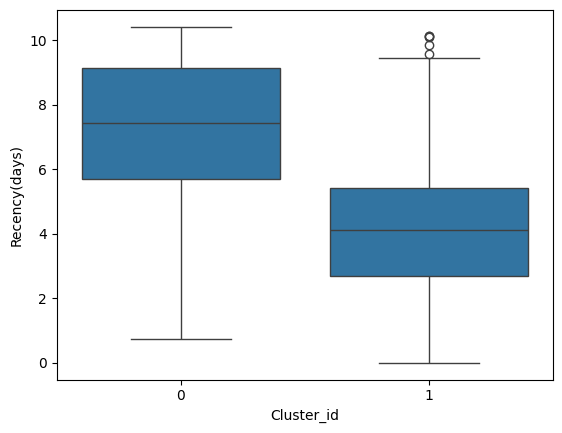

In [103]:
sns.boxplot(x='Cluster_id', y= 'Recency(days)', data=df_filtered)
plt.show()

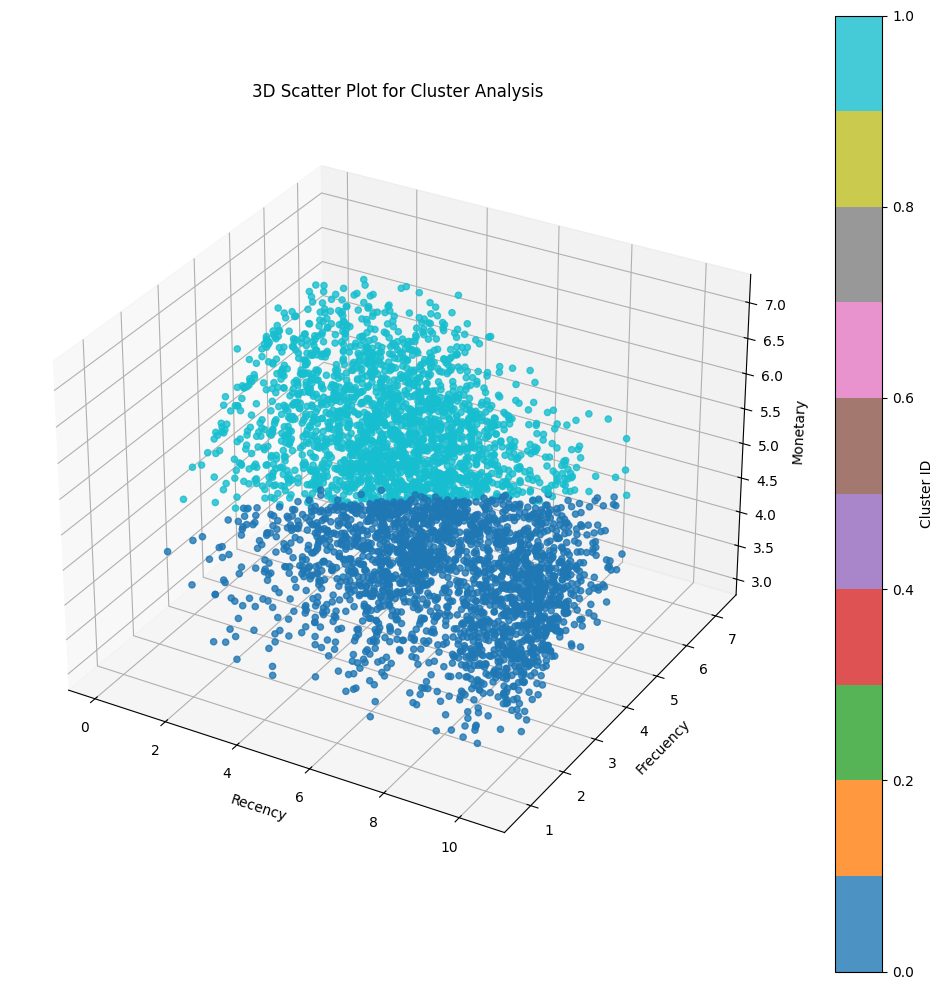

In [104]:
# Crear figura 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Variables numéricas
x = df_filtered['Recency(days)']  # Eje X
y = df_filtered['Frecuency']  # Eje Y
z = df_filtered['Monetary']  # Eje Z

# Gráfico de dispersión 3D con colores distintos para cada cluster
sc = ax.scatter(x, y, z, c=df_filtered['Cluster_id'], cmap='tab10', marker='o', alpha=0.8)

# Etiquetas
ax.set_xlabel('Recency')
ax.set_ylabel('Frecuency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot for Cluster Analysis')

# Añadir barra de colores
plt.colorbar(sc, ax=ax, label='Cluster ID')

plt.tight_layout()
plt.show()

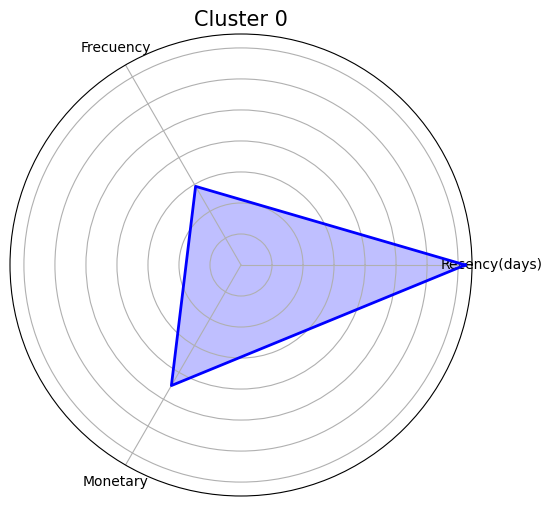

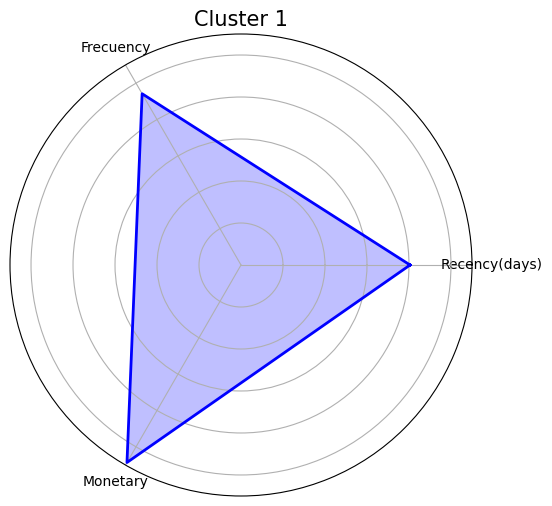

In [105]:
cluster_profile = df_filtered.drop(['CustomerID'], axis=1).groupby('Cluster_id').mean()

# Radar plot
labels = cluster_profile.columns  # Nuevas etiquetas sin 'CustomerID' y 'Genre'
num_vars = len(labels)

for index, row in cluster_profile.iterrows():
    # Crear ángulos para el radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    row = np.concatenate((row, [row.iloc[0]]))  # Cerrar el círculo
    angles += angles[:1]

    # Crear la gráfica polar
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, row, color='blue', alpha=0.25)
    ax.plot(angles, row, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_title(f'Cluster {index}', size=15)
    plt.show()

## **Cluster 0**
Este grupo representa a los clientes que han pasado un período prolongado desde su última compra (Recency alta). Además, compran con baja frecuencia y realizan gastos limitados en sus transacciones. Estos clientes podrían considerarse inactivos o dormidos, lo que sugiere la necesidad de estrategias de reactivación para recuperar su interés.

This group represents customers who have gone a long period without making a purchase (high Recency). They also make infrequent purchases and have low spending levels in their transactions. These customers may be considered inactive or dormant, suggesting the need for reactivation strategies to regain their interest.

## **Cluster 1**

Este grupo está compuesto por clientes que realizan compras frecuentes (Frequency alta) y tienen un gasto elevado por transacción (Monetary alto). Además, su período desde la última compra es relativamente corto (Recency baja), lo que indica un comportamiento activo y comprometido. Estos clientes podrían clasificarse como leales o VIP, siendo ideales para campañas de fidelización y recompensas exclusivas.

This group consists of customers who make frequent purchases (high Frequency) and have high spending amounts per transaction (high Monetary). Additionally, their last purchase occurred recently (low Recency), indicating active and engaged behavior. These customers could be classified as loyal or VIP, making them ideal candidates for loyalty programs and exclusive rewards.

## **Prueba con datos**

In [115]:
np.random.seed(42)
# Cargar los modelos
pt_loaded = joblib.load('yeo_johnson_transformer.pkl')  # Yeo-Johnson
scaler_loaded = joblib.load('scaler_transformer.pkl')  # StandardScaler
kmeans_loaded = joblib.load('Modelo_KMeans.pkl')  # Modelo KMeans

In [118]:
# Nuevos datos simulados
new_data = pd.DataFrame({
    'Recency(days)': [10, 200, 50],
    'Frecuency': [150, 20, 60],
    'Monetary': [4000.00, 800.00, 1500.00]
}, columns=num_type)

In [123]:
# Aplicar transformación Yeo-Johnson
new_data_yj = pt_loaded.transform(new_data)
# **Volver a asignar nombres a las columnas transformadas**
new_data_yj = pd.DataFrame(new_data_yj, columns=new_data.columns)
# Estandarizar los datos
new_data_scaled = scaler_loaded.transform(new_data_yj)
# **Volver a asignar nombres a las columnas escaladas**
new_data_scaled = pd.DataFrame(new_data_scaled, columns=new_data.columns)
# Predecir las etiquetas con el modelo cargado
predictions = kmeans_loaded.predict(new_data_scaled)
# Agregar la predicción al DataFrame
new_data['Predicted_Cluster'] = predictions

In [124]:
new_data

,Recency(days),Frecuency,Monetary,Predicted_Cluster
0,10,150,4000.0,1
1,200,20,800.0,0
2,50,60,1500.0,1
